In [181]:
import numpy as np
import pandas as pd

In [3]:
#Series with custom indices
data = [100,200,300,400]
custom_index = ["A","B","C","D"]

pd.Series(data,index=custom_index)

A    100
B    200
C    300
D    400
dtype: int64

In [13]:
#Data frame with custom indices
data = {
    "Name":["John","Doe","Jack"],
    "Age":[21,20,23],
    "Salary":[50000,45000,60000]
}

df = pd.DataFrame(data,index=["emp1","emp2","emp3"])
df

,Name,Age,Salary
emp1,John,21,50000
emp2,Doe,20,45000
emp3,Jack,23,60000


In [15]:
# loc - Label based indexing
print(df.loc["emp2"])

Name        Doe
Age          20
Salary    45000
Name: emp2, dtype: object


In [17]:
#iloc - Integer based indexing
print(df.iloc[2])

Name       Jack
Age          23
Salary    60000
Name: emp3, dtype: object


In [49]:
data_dup = pd.DataFrame({
    "Name":["john","doe","john","doe"],
    "Age":[21,20,21,20],
    "Salary":[60000,45000,50000,45000]
})
 #row based
print(data_dup.drop_duplicates(),end="\n\n")

#column based
print(data_dup.drop_duplicates(subset=["Name"],keep = "first"),end="\n\n")

print(data_dup.drop_duplicates(subset=["Name"],keep = "last"),end="\n\n") 

#remove all occurances of duplicated rows
print(data_dup.drop_duplicates(keep=False)) 

   Name  Age  Salary
0  john   21   60000
1   doe   20   45000
2  john   21   50000

   Name  Age  Salary
0  john   21   60000
1   doe   20   45000

   Name  Age  Salary
2  john   21   50000
3   doe   20   45000

   Name  Age  Salary
0  john   21   60000
2  john   21   50000


In [79]:
# Navigating a Data Frame

print(df,end='\n\n')
print(df.head(2),end='\n\n') #first 2 rows
print(df.tail(2),end='\n\n') # last 2 rows

# Get the column names
print(df.columns,end='\n\n')

#Get the summary of the Data frame
print(df.info(),end='\n\n')

# Get the statistical summary of the data frame
print(df.describe(),end='\n\n')

      Name  Age  Salary
emp1  John   21   50000
emp2   Doe   20   45000
emp3  Jack   23   60000

      Name  Age  Salary
emp1  John   21   50000
emp2   Doe   20   45000

      Name  Age  Salary
emp2   Doe   20   45000
emp3  Jack   23   60000

Index(['Name', 'Age', 'Salary'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, emp1 to emp3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Salary  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
None

             Age        Salary
count   3.000000      3.000000
mean   21.333333  51666.666667
std     1.527525   7637.626158
min    20.000000  45000.000000
25%    20.500000  47500.000000
50%    21.000000  50000.000000
75%    22.000000  55000.000000
max    23.000000  60000.000000



In [131]:
# Grouping and sorting
df = pd.DataFrame({
    "name":["john","doe","john","john"],
    "age":[21,20,21,22],
    "salary":[20000,30000,40000,10000]
})
print(df.groupby(["name","age"]).sum())
print(df.groupby(["name"]).sum())
print(df.groupby(["age"]).sum())
print(df.groupby(["name"]).mean())

print("\n \n Avoid Sorting \n \n ")
print(df.groupby(["age"],sort=False).sum())
print(df.groupby(["name"],sort=False).mean())

          salary
name age        
doe  20    30000
john 21    60000
     22    10000
      age  salary
name             
doe    20   30000
john   64   70000
         name  salary
age                  
20        doe   30000
21   johnjohn   60000
22       john   10000
            age        salary
name                         
doe   20.000000  30000.000000
john  21.333333  23333.333333

 
 Avoid Sorting 
 
 
         name  salary
age                  
21   johnjohn   60000
20        doe   30000
22       john   10000
            age        salary
name                         
john  21.333333  23333.333333
doe   20.000000  30000.000000


In [141]:
# correlation - Measures how strongly 2 variables are related
print(df[["age","salary"]].corr(),end='\n\n') #correlation matrix

# covariance = Measures the direction of the relationship
print(df[['age','salary']].cov(),end='\n\n') #covariance matrix

             age    salary
age     1.000000 -0.632456
salary -0.632456  1.000000

                age        salary
age        0.666667 -6.666667e+03
salary -6666.666667  1.666667e+08



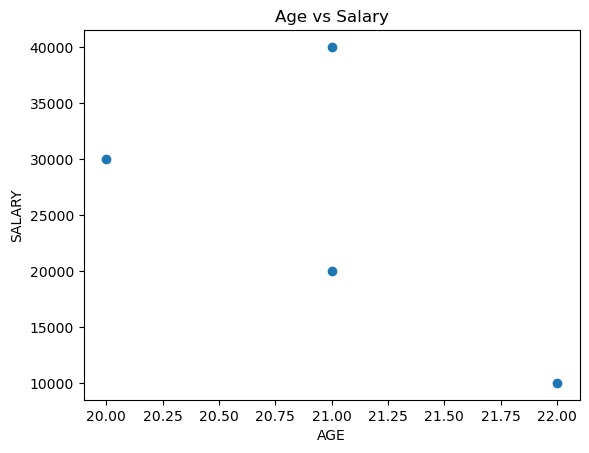

In [149]:
#Scatter plotting

import matplotlib.pyplot as plt

plt.scatter(df["age"],df['salary'])
plt.xlabel("AGE")
plt.ylabel("SALARY")
plt.title("Age vs Salary")
plt.show()


<Axes: xlabel='age', ylabel='salary'>

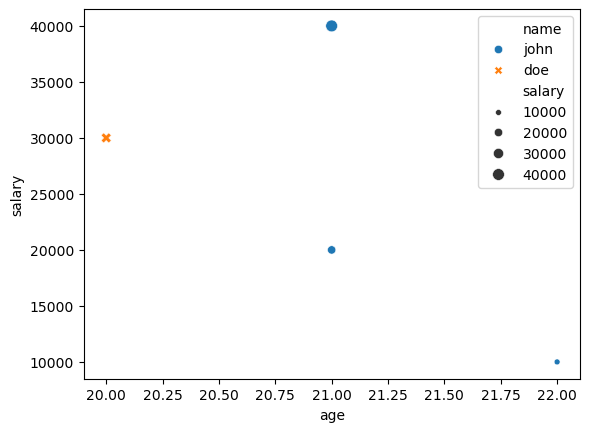

In [169]:
#  x / y - Columns for x and y axes (required)
# data - dataFrame Src (required)
# hue - Color by category (None)
# size - Vary point size based on a column (None)
# style - Different markers for catergories (None)
# alpha - Transparency(0-1) (1.0) 
sns.scatterplot(x="age",y="salary",data=df,hue="name",size='salary',style='name',alpha=1)

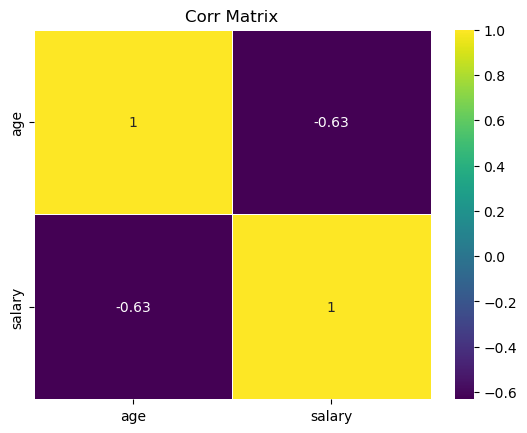

In [177]:
# Correlation Matrix (Heat Map)
import seaborn as sns 
# data - 2D data (correlation matrix) 
# annot 0 show values in heatmap (default - False)
# cmap - color map ('coolwarm','viridis','Blues','hot') - default = viridis
# linewidth - width of grid lines (def = 0)
# vmin/ vmax  - min or max values of color scaling (def - None)
sns.heatmap(df[["age","salary"]].corr(),annot=True,cmap="viridis",linewidth=0.5) 
plt.title("Corr Matrix")
plt.show()

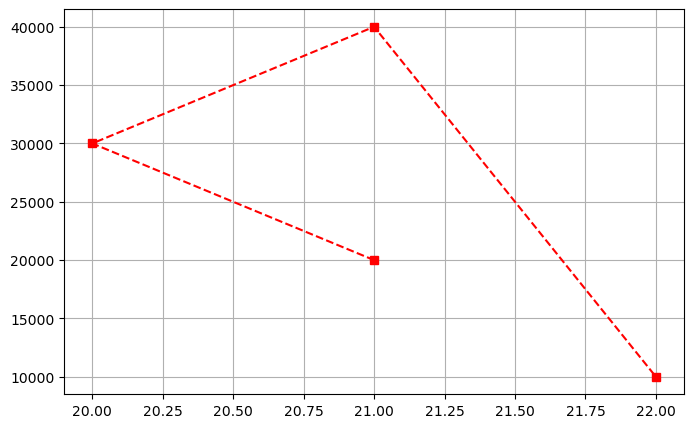

In [237]:
# Line plot - Used to show trends over time or continuous data relationships.


x = df['age']
y = df['salary']
# linestyle - '-', '--',':','-.'  def(--)
# marker - 'o', 's' ,' ^' ,'d' def(o)
#           circle, square, triangle,diamond
# color - 'red','blue','green' def(blue)
# label - legend label for the line      

plt.figure(figsize= (8,5))
plt.plot(x,y,linestyle='--',color='red',marker='s',label='Line plotting')
plt.legend()  # Label 
plt.grid(True)
plt.show()

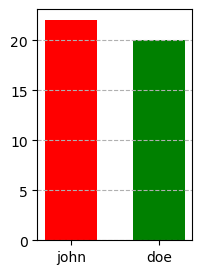

In [257]:
# Bar Chart - Used to compare categories (e.g., sales per region).

plt.figure(figsize=(2,3))
plt.bar(df["name"],df['age'],color=['blue','green','orange','red'],width = 0.6)
plt.grid(axis='y',linestyle = '--')


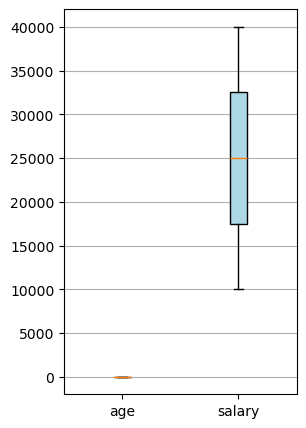

In [267]:
# Box plot - Used to show the spread and outliers of data.

# patch_artist - Filles boxes with color 
# boxprops - change box color 


data = [df['age'], df['salary']]
plt.figure(figsize=(3,5))
plt.boxplot(data,tick_labels=["age","salary"],patch_artist = True, boxprops = dict(facecolor='lightblue'))
plt.grid(axis='y',linestyle='-')

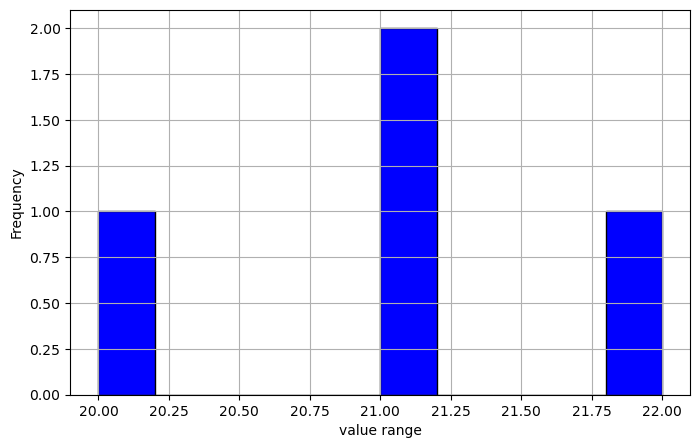

In [317]:
# Histograms - Used to show data distribution (e.g., exam scores of students).

# bins - Number of bins to display
# alpha - transparency
# edgecolor - Bin border color

plt.figure(figsize=(8,5))
plt.hist(df["age"], bins = 10,color=['blue'],edgecolor='black')
plt.xlabel("value range")
plt.ylabel("Frequency")
plt.grid(linestyle='-')

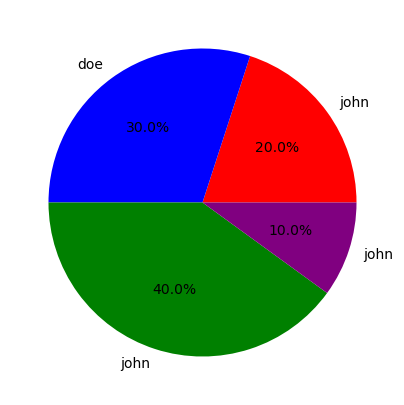

In [335]:
# piecharts - Used to show proportions of categories.

# autopct - show percentage labels
# startangle - rotate chart

colors = ['red','blue','green','purple']
plt.figure(figsize=(5,5))
plt.pie(df['salary'],labels=df['name'],colors=colors,autopct="%1.1f%%",startangle=0)
plt.show()

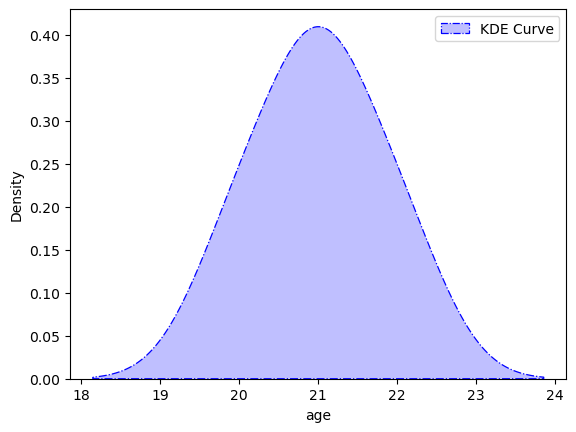

In [355]:
# KDE(Kernal Density Function) - Used to visualize the distribution of a dataset. Similar to a histogram, but it provides a smoothed, continuous curve instead of discrete bins.


# data	- Input data (array, Series, DataFrame)	Required
# x	- Column name for X-axis (if DataFrame)	None
# y	- Column name for Y-axis (for bivariate KDE)	None
# hue -	Group data by categories	None
# weights - 	Weights for each observation	None
# bw_adjust - 	Adjusts KDE smoothing (lower = less smooth, higher = more smooth)	1
# bw_method	- Kernel bandwidth selection ("scott", "silverman", float)	"scott"
# gridsize	- Number of evaluation points in the plot	200
# cut	- Extend beyond data range (higher = wider)	3
# clip	- Limits the X-axis range (tuple)	(-inf, inf)
# cumulative -	Shows cumulative distribution (True/False)	False
# fill	- Fills the area under the curve	False
# alpha	- Transparency of filled area (0 to 1)	1.0
# color	- Line color ("blue", "red", etc.)	None
# linewidth	- Line thickness	1.5
# linestyle	- Line style ("-", "--", ":")	"-"
# multiple	- Stacks multiple KDE plots ("layer", "stack", "fill")	"layer"
# common_norm - Normalize multiple KDEs to 1 (True/False)	True
# common_grid -	Use same evaluation grid for multiple KDEs	False
# legend -	Show/hide legend (True/False)	True
sns.kdeplot(df['age'],fill=True,color='blue',label="KDE Curve",linestyle='-.',linewidth=0.9)
plt.legend()
plt.show()